In [1]:
# From https://matplotlib.org/3.1.1/gallery/ticks_and_spines/spine_placement_demo.html
def adjust_spines(ax,spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(False)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [2]:
##0 imports, moving average definition
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')

#enter populations
#us population 328,239,523
#benton county 93,053
#oregon population 4,217,737
#new york population 19,453,561
#initialize population dictionary
pop={}
pop['us']=323823952.
pop['benton']=93053.
pop['Oregon']=4217737.
pop['Montana']=1068778
pop['Nevada']=3080156
pop['California']=39512223
pop['Idaho']=1787065
pop['New York']=19453561
pop['Washington']=7614893

In [12]:
##1. download states and do preliminary analysis
#states_for_analysis=['Oregon', 'Washington', 'New York', 'California', 'Nevada', 'Idaho', 'Montana']
states_for_analysis=['Oregon',  'California', 'Nevada', 'Idaho']
us_data_location='/users/tim/python_packages/covid-19-data/us.csv'
states_data_location='/users/tim/python_packages/covid-19-data/us-states.csv'
alldt={}
ave_arrays={}
date_arrays={}
len_arrays=[]
scale_factor=1e5
import numpy as np
import datetime
alldt['us']=np.genfromtxt(us_data_location,delimiter=',',dtype=str)
float_us_array=alldt['us'][1:,1].astype(int)
diff_us_array=np.diff(float_us_array)
ave_arrays['us']=scale_factor*movingaverage(diff_us_array,7)/pop['us']
date_arrays['us']=[datetime.datetime.strptime(crstr,'%Y-%m-%d') for crstr in alldt['us'][1:,0]]
len_us=len(ave_arrays['us'])

alldt_states=np.genfromtxt(states_data_location,delimiter=',',dtype=str)
state_list=alldt_states[:,1]

for crstatekey in states_for_analysis:
    
    crinds=np.where(state_list==crstatekey)[0]
    
    float_array=alldt_states[crinds,3].astype(int)
    diff_array=np.diff(float_array)
    
    date_arrays[crstatekey]=[datetime.datetime.strptime(crstr,'%Y-%m-%d') for crstr in alldt_states[crinds,0]]
   
    ave_arrays[crstatekey]=scale_factor*movingaverage(diff_array,7)/pop[crstatekey]
    len_arrays.append(len(ave_arrays[crstatekey]))


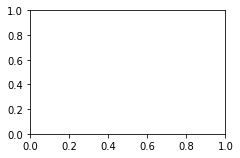

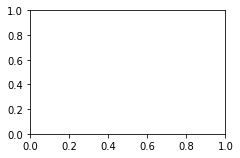

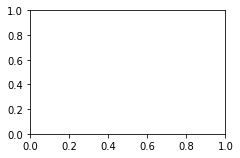

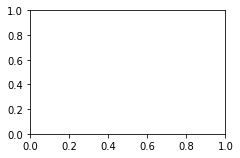

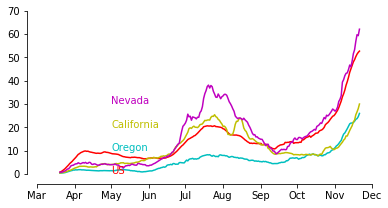

In [22]:

HEAT_MAP_FLAG=False
MAKE_TIME_TRACE=True

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.show()
minlen=np.min(len_arrays)
dat_all=np.zeros((len(states_for_analysis)+1,minlen))
#date_all=np.zeros((len(states_for_analysis)+1,minlen))
startvl=len_us-minlen
dat_all[0,:]=ave_arrays['us'][startvl:]
state_list=['US']
colors='rcymk'
#date_all=
for state_ind,crstatekey in enumerate(states_for_analysis):
    

    fig=plt.figure()
    fig.set_size_inches(3.5,5 )
    ax=plt.subplot(211)
    crlen=len(ave_arrays[crstatekey])
#newyork_len=len(ave_newyork_array)
#us_len=len(ave_us_array)

    xinds=np.arange(minlen)
   
    startvl=crlen-minlen
    date_start=len(date_arrays[crstatekey])-len(ave_arrays[crstatekey])
    state_list.append(crstatekey)
    dat_all[state_ind+1,:]=ave_arrays[crstatekey][startvl:]
    dates_to_plot=date_arrays[crstatekey][startvl+date_start:]
if HEAT_MAP_FLAG:
    from astropy.visualization import simple_norm
    fig=plt.figure()
    fig.set_size_inches(6,6 )
    ax=plt.subplot(211)
    norm = simple_norm(dat_all, 'log')
    plt.hot()

    im=ax.imshow(dat_all)
    im.set_clim(0.5,35) 
    ax.set_aspect(10)
    plt.colorbar(im)

    ax.yaxis.grid()

if MAKE_TIME_TRACE:
    fig=plt.figure()
    fig.set_size_inches(6,3)
    text_pltx=datetime.date(2020, 5, 1)
    ax=plt.gca()
    month_locator=mdates.MonthLocator()
    fmt=mdates.DateFormatter('%b')
    for st_ind,pltnum in enumerate(states_for_analysis):
        crcol=colors[st_ind]
        plt.plot(mdates.date2num(dates_to_plot),dat_all[st_ind,:],crcol)
        if state_ind:
            ax.text(text_pltx,10*st_ind,state_list[st_ind],color=crcol)
    ax.xaxis.set_major_locator(month_locator)
    ax.xaxis.set_major_formatter(fmt)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 12, 1)])
    ax.set_ylim(0, 70)
    adjust_spines(ax,['left','bottom'])
    plt.savefig("flyer_covid_traces.pdf", transparent=True)



In [87]:
print(ax.get_xlim())

(737492.65, 737742.35)


In [11]:
len(ave_arrays['us'])

299

In [51]:
len(date_arrays['Oregon'])

249

In [22]:
type(dates_to_plot[0])

numpy.str_

In [160]:
ave_diff_array[1]

0.7142857142857142

In [47]:
np.shape(ave_arrays[crstatekey])

(228,)

In [23]:
datetime(alldt_states[crinds,0])


NameError: name 'datetime' is not defined

In [7]:
alldt['us']

array([['date', 'cases', 'deaths'],
       ['2020-01-21', '1', '0'],
       ['2020-01-22', '1', '0'],
       ['2020-01-23', '1', '0'],
       ['2020-01-24', '2', '0'],
       ['2020-01-25', '3', '0'],
       ['2020-01-26', '5', '0'],
       ['2020-01-27', '5', '0'],
       ['2020-01-28', '5', '0'],
       ['2020-01-29', '5', '0'],
       ['2020-01-30', '6', '0'],
       ['2020-01-31', '7', '0'],
       ['2020-02-01', '8', '0'],
       ['2020-02-02', '11', '0'],
       ['2020-02-03', '11', '0'],
       ['2020-02-04', '11', '0'],
       ['2020-02-05', '12', '0'],
       ['2020-02-06', '12', '0'],
       ['2020-02-07', '12', '0'],
       ['2020-02-08', '12', '0'],
       ['2020-02-09', '12', '0'],
       ['2020-02-10', '13', '0'],
       ['2020-02-11', '13', '0'],
       ['2020-02-12', '14', '0'],
       ['2020-02-13', '15', '0'],
       ['2020-02-14', '15', '0'],
       ['2020-02-15', '15', '0'],
       ['2020-02-16', '15', '0'],
       ['2020-02-17', '25', '0'],
       ['2020-02-18', '2

In [194]:
cd covid-19-data/

/Users/tim/python_packages/covid-19-data


In [196]:
alldt_us=np.genfromtxt('us.csv',delimiter=',',dtype=str)
float_us_array=alldt_us[1:,1].astype(int)
diff_us_array=np.diff(float_us_array)
ave_us_array=movingaverage(diff_us_array,7)

In [226]:
alldt_states=np.genfromtxt('us-states.csv',delimiter=',',dtype=str)
alldt_us=np.genfromtxt('us.csv',delimiter=',',dtype=str)
float_us_array=alldt_us[1:,1].astype(int)
diff_us_array=np.diff(float_us_array)
ave_us_array=movingaverage(diff_us_array,7)
float_us_array=alldt_us[1:,1].astype(int)
diff_us_array=np.diff(float_us_array)
ave_us_array=movingaverage(diff_us_array,7)

In [11]:
#enter populations
#us population 328,239,523
#benton county 93,053
#oregon population 4,217,737
#new york population 19,453,561
#initialize population dictionary
pop={}
pop['us']=323823952.
pop['benton']=93053.
pop['oregon'=4217737.
newyorkpop=19453561

TypeError: data type not understood

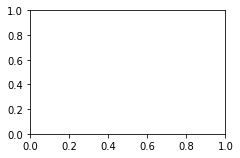

In [13]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_size_inches(3.5,5 )
ax=plt.subplot(211)
oregon_len=len(ave_oregon_array)
newyork_len=len(ave_newyork_array)
us_len=len(ave_us_array)
min([np.shape(ave_us_array),np.shape(ave_oregon_array) ,np.shape(ave_newyork_array)])
xinds=np.arange(newyork_len)
dat_all=np.zeros(3,newyork_len)
startvl=us_len-newyork_len
plt.plot(xinds,ave_us_array[startvl:]*1e5/uspop)
dat_all[0,:]=ave_us_array[startvl:]
#plt.plot(ave_benton_array*1e5/bentonpop)
startvl=oregon_len-newyork_len
plt.plot(xinds,ave_oregon_array[startvl:]*1e5/oregonpop)
dat_all[0,:]=ave_oregon_array[startvl:]
plt.plot(xinds,ave_newyork_array*1e5/newyorkpop)
dat_all[2,:]=ave_newyork_array

ax.set_yscale('log')
ax.set_ylim([0.1,100])
plt.savefig("test_covid.pdf", transparent=True)

#ax.set_aspect(aspect=0.5)

In [258]:
len(ave_newyork_array)

217

In [242]:
fig=plt.figure()
fig.set_size_inches(6.5,5 )
ax=plt.subplot(211)
oregon_len=np.shape(ave_oregon_array)
newyork_len=np.shape(ave_newyork_array)
min([np.shape(ave_us_array),np.shape(ave_oregon_array) ,np.shape(ave_newyork_array)])
xinds=np.arange(oregon_len)
plt.plot(xinds,ave_us_array(*1e5/uspop)
#plt.plot(ave_benton_array*1e5/bentonpop)
plt.plot(xinds,ave_oregon_array*1e5/oregonpop)
startvl=newyork_len-oregon_len
plt.plot(xinds,ave_newyork_array[startvl:]*1e5/newyorkpop)
ax.set_yscale('log')
ax.set_ylim([0.1,100])

SyntaxError: invalid syntax (<ipython-input-242-8edf34c2b88e>, line 10)

In [242]:
fig=plt.figure()
fig.set_size_inches(6.5,5 )
ax=plt.subplot(211)
oregon_len=np.shape(ave_oregon_array)
newyork_len=np.shape(ave_newyork_array)
min([np.shape(ave_us_array),np.shape(ave_oregon_array) ,np.shape(ave_newyork_array)])
xinds=np.arange(oregon_len)
plt.plot(xinds,ave_us_array(*1e5/uspop)
#plt.plot(ave_benton_array*1e5/bentonpop)
plt.plot(xinds,ave_oregon_array*1e5/oregonpop)
startvl=newyork_len-oregon_len
plt.plot(xinds,ave_newyork_array[startvl:]*1e5/newyorkpop)
ax.set_yscale('log')
ax.set_ylim([0.1,100])

SyntaxError: invalid syntax (<ipython-input-242-8edf34c2b88e>, line 10)

(0.1, 100)

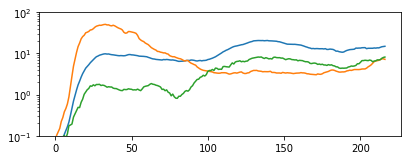

In [36]:
fig=plt.figure()
fig.set_size_inches(6.5,5 )
ax=plt.subplot(211)
oregon_len=len(ave_oregon_array)
newyork_len=len(ave_newyork_array)
us_len=len(ave_us_array)
min([np.shape(ave_us_array),np.shape(ave_oregon_array) ,np.shape(ave_newyork_array)])
xinds=np.arange(newyork_len)
dat_all=np.empty((3,newyork_len))
startvl=us_len-newyork_len
plt.plot(xinds,ave_us_array[startvl:]*1e5/uspop)
dat_all[0,:]=ave_us_array[startvl:]*1e5/uspop
#plt.plot(ave_benton_array*1e5/bentonpop)
plt.plot(xinds,ave_newyork_array*1e5/newyorkpop)
dat_all[1,:]=ave_newyork_array*1e5/newyorkpop
startvl=oregon_len-newyork_len
plt.plot(xinds,ave_oregon_array[startvl:]*1e5/oregonpop)
dat_all[2,:]=ave_oregon_array[startvl:]*1e5/oregonpop
ax.set_yscale('log')
ax.set_ylim([0.1,100])

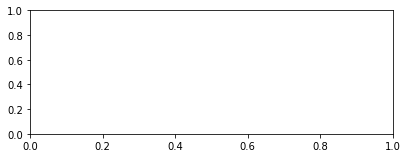

In [22]:
fig=plt.figure()
fig.set_size_inches(6.5,5 )
ax=plt.subplot(211)
oregon_len=len(ave_oregon_array)
newyork_len=len(ave_newyork_array)

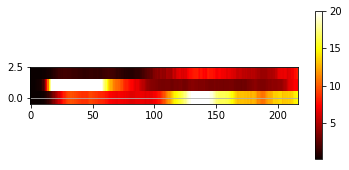

In [86]:
from astropy.visualization import simple_norm
fig=plt.figure()
fig.set_size_inches(6,6 )
ax=plt.subplot(211)
norm = simple_norm(dat_all, 'log')
plt.hot()

im=ax.imshow(dat_all,origin='lower')
im.set_clim(0.1,20) 
ax.set_aspect(10)
plt.colorbar(im)
ax.yaxis.grid()


In [35]:
np.isnan(dat_all)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [188]:
np.shape(ave_ore_array)

NameError: name 'ave_ore_array' is not defined

In [189]:
np.shape(ave_ny_array)

(216,)

In [224]:
pwd

'/Users/tim/python_packages/covid-19-data'

In [225]:
ls

LICENSE                         live/
NEW-YORK-DEATHS-METHODOLOGY.md  mask-use/
PROBABLE-CASES-NOTE.md          us-counties.csv
README.md                       us-states.csv
colleges/                       us.csv
excess-deaths/


In [229]:
np.shape(ave_us_array)

(257,)

In [230]:
np.shape(ave_oregon_array)

(219,)

In [231]:
np.shape(ave_newyork_array)

(217,)

In [233]:
min([np.shape(ave_us_array),np.shape(ave_oregon_array) ,np.shape(ave_newyork_array)])

(217,)